# TP 2 Expectation-Maximisation algorithm – Importance sampling

>[TP 2 Expectation-Maximisation algorithm – Importance sampling](#scrollTo=dTuS5cQ18u1s)

>>[Imports](#scrollTo=amNeMKEH89ZF)

>>[Exercice 1 : Discrete distributions](#scrollTo=_pwTqoZH9MdE)

>>[Exercice 2: Gaussian mixture model and the EM algorithm](#scrollTo=8yNdSFZe_rnR)

>>>[Question 1](#scrollTo=_dIbJ0bz4tuJ)

>>>[Question 2](#scrollTo=Io7Gdsc99Cjy)

>>>[Question 3/4](#scrollTo=CeVCjFKWwoms)

>>>[Question 5](#scrollTo=SFTUQGflLkMy)

>>>[Question 6](#scrollTo=hFkSSLocTgB0)

>>[Exercise 3: Importance sampling](#scrollTo=kMOg10DEsDFh)

>>>[3.A – Poor Importance Sampling](#scrollTo=-RasXiz5xLiN)



## Imports 

In [1]:
import scipy 
import scipy.stats
import numpy as np
import pylab as plt
import pandas as pd 

## Exercice 1 : Discrete distributions

*1_ Explain how to generate a random variable X having the discrete distribution on X*
> The goal is to simulate $X$ with $P(X=x_i)=p_i$, $p_i\geq 0$, $∑_i p_i=1$.
  We consider an algorithm to generate a random variable X given by a probability distribution $P$. [This algorithm is inspired from this paper :](https://repository.upenn.edu/cgi/viewcontent.cgi?article=1144&context=cis_reports)

> *Step 1: Generate U (uniform random variable in the interval (0,l) ) and compute C the cumulative probability of P*

> *Step 2. Loop on number of samples append the indexes that satisfy u ∈ $[c_i, c_{i+1}[$*



> **This exercise will be useful for the rest for generating discrecte distribution following hireacal model**








*2_ Write the algorithm*

In [2]:
def Generate_discrete_dist(P, N):
  '''
  Returns X a random discrete distribution following the probability distribution P

  Parameters
  ----------
  P: array of floats 
    the probability distribution
  N: int 
    number of sample to be generated
  '''
  #initializing
  U=np.random.uniform(0,1,N)
  C= [*[0.0], *np.cumsum(P)] 
  #loop to test the validity condition
  sample=[np.where(C <= U[i])[0][-1] for i in range(N)]
  
  return sample

*3_ Generate a sequence $(X_i)_i$ of i.i.d. random variables having the same distribution as $X$ for large values of N. Compare the empirical distribution to the theoretical distribution of X. (InPython, you can use the function numpy.histogram).*

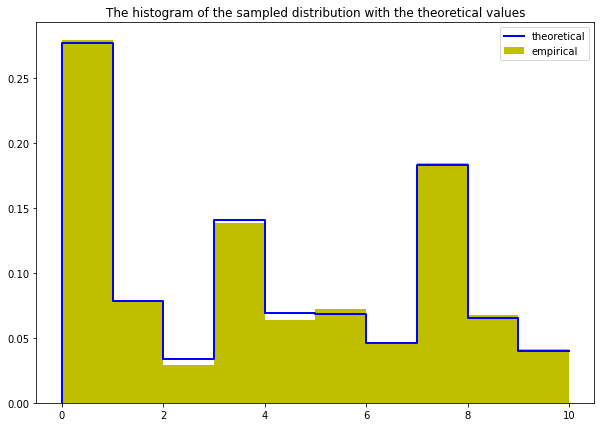

In [3]:
####### PARAMETERS #######
n = 10
N = 3000
##########################

p = np.random.rand(n)                     #probability distribution
p /= sum(p)                               #normalize
sample =Generate_discrete_dist(p,N)       #generate sample

# Plot the histogram 
plt.figure(figsize=(10,7))

h = plt.hist(sample,range(0,len(p)+1),density = True ,color='y', label = 'empirical')                       #histogram of generated sample
plt.step([*[0.0], *np.arange(0,len(p))+ 1 ] , [*[0.0], *p],color='b', label= 'theoretical' , linewidth = 2) #theoretical distribution 

plt.title('The histogram of the sampled distribution with the theoretical values')
plt.legend()
plt.show() 

*Comment:*


> Through the histogram we can notice that empirical and theoretical values are very close to each other. We can run this test on multiple sizes of camples we notice that the higher the sample size is the closer we get to the theoretical distribution. 


## Exercice 2: Gaussian mixture model and the EM algorithm

A Gaussian mixture model (GMM) is useful for modelling data that comes from one of several groups:
the groups might be different from each other, but data points within the same group can be well
modelled by a Gaussian distribution. 
 

1.   The main issue is to estimate the parameters of the mixture, i.e
to find the most likely ones.
2.   Moreover, we aim to determine if our sample follows a Gaussian mixture
distribution or not.

 
Let consider a n-sample. For each individual, we observe a random variable $X_i$ and assume there is
an unobserved variable $Z_i$ for each person which encodes the class of $X_i$

More formally, we consider a
mixture of m Gaussians: let $(α_1, . . . , α_m) ∈ R_m$ such that $∑ \alpha_i=1$ and the following hierarchical model:

$∀i ∈ [1, n], ∀j ∈ [1, m], P_θ(Z_i = j) = α_j$

and  $∀i ∈ [1, n], ∀j ∈ [1, m] X_i | θ, \left\{Z_i = j\right\} ∼ N (μ_j , Σ_j ).$

### Question 1



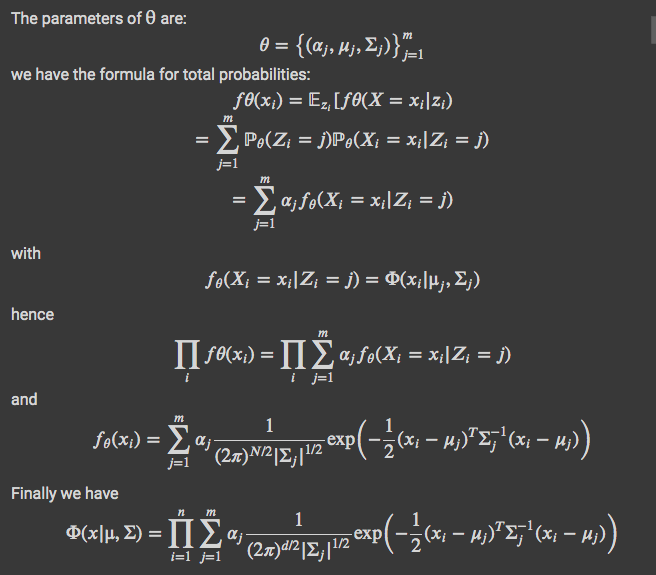

### Question 2

> In this question we sample a set of observations  according to a gaussian mixture law. We start  by randomny generating the parameters of the gaussian
distribution to simplify the process of choosing the parameters. The next step is generating a discrete distribution for the hierarcal model $Z$ using the generated $α$. After that using the parameters of $z$ and random.multivariate_normal (this function Draw random samples from a multivariate normal distribution which is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix.) 





In [4]:
def generate_parameters(n_features):
  '''
  Returns parameters for the Gaussian mixture law

  Parameters
  ----------
  n_features : int
        The number of mixtures
  
  ''' 
  # Generate alpha
  alpha = np.random.rand(n_features)
  alpha /= sum(alpha)                     
  # Generate mu
  mu = np.random.rand(n_features, 2)
  # Generate sigma: positive semidefinite
  sigma = []
  for _ in range(n_features):
    v1, v2, angle = np.random.rand(3) 
    c, s = np.cos(angle), np.sin(angle)
    D = np.diag([v1*v1, v2*v2])
    R = np.matrix([[c, -s], [s, c]])
    sigma.append(R * D * R.transpose())
  sigma = np.array(sigma)
  return alpha, mu, sigma

In [7]:
def sample_Gaussian_mixture(n_samples, n_features, return_parameters=False, plot_dist=True):
  '''
  Function that samples a gaussian mixture model

  Parameters
  ----------
  n_samples : int 
          The number of sample to generate 
  n_features : int, default=2
        The number of mixtures
  return_parameters: bool , default=True
         Returns the generated parameters for the gaussian distribution
  plot_dist: bool , default=True 
         Plots the generated ditribution
  '''
  sample_gauss = [] 
  labels = []

  #parameters: using the randomnly generated ones 
  alpha, mu, sigma= generate_parameters(n_features)

  # the hierarchical model: using the function of exercise 1 
  Z = Generate_discrete_dist(alpha, n_samples)

  # Use the hierarchical model
  for z in Z: 
    sample_gauss.append(np.random.multivariate_normal(mu[int(z)], sigma[int(z)]))
    labels.append(int(z))
  sample_gauss = np.array(sample_gauss)

  if plot_dist:
    # Visualize the results
    plt.figure(figsize=(10,5))
    plt.scatter(sample_gauss[:,0], sample_gauss[:,1] , c= labels , cmap = 'viridis')
    plt.title('Gaussian Mixture Samples for '+str(n_features)+' clusters')
    plt.show()
  
  if return_parameters:
    return alpha, mu, sigma, sample_gauss, labels
  return sample_gauss, labels


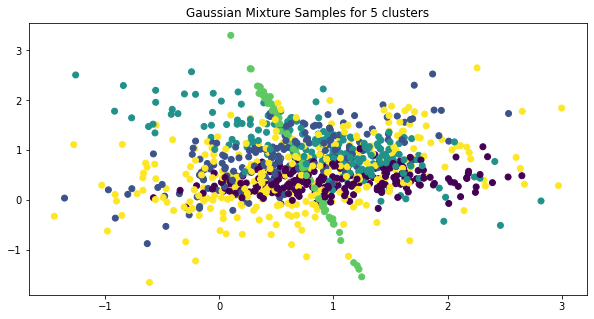

In [10]:
####### PARAMETERS #######
n_clusters = 5
n_samples =1000
##########################

sample_gauss, labels = sample_Gaussian_mixture(n_samples, n_clusters)



> The randomly generated parameters enable us to see various distribution incorporated into the gaussian mixture law. 



### Question 3/4


**Let's impliment the EM algorithm**

Expectation-Maximization algorithm can be used for the latent variables (variables that are not directly observable and are actually inferred from the values of the other observed variables) too in order to predict their values with the condition that the general form of probability distribution governing those latent variables is known to us. This algorithm is actually at the base of many unsupervised clustering algorithms in the field of machine learning.

Algorithm:



1.   Given a set of incomplete data,consider a set of starting parameters.
2.   Expectation step (E – step): Using the observed available data of the dataset, estimate (guess) the values of the missing data. 

3. Maximization step (M – step): Complete data generated after the expectation (E) step is used in order to update the parameters.
4. Repeat step 2 and step 3 until convergence.

[For the case of gaussian mixture we use the following pseudo algo](https://perso.telecom-paristech.fr/bonald/documents/gmm.pdf):


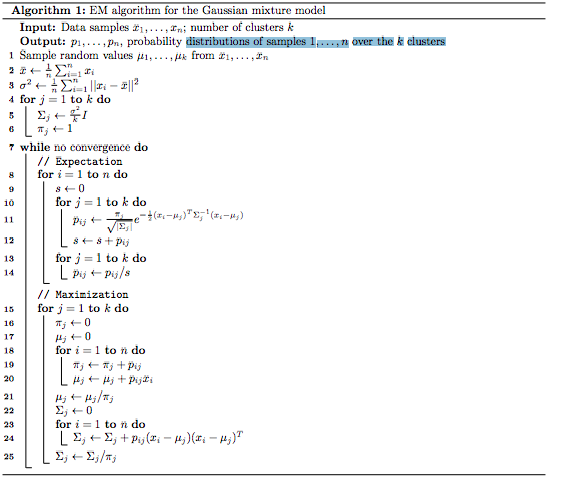





**Additionnally we're going to plot the log-likelihood over the number of iterations of the algorithm.**

**`Intermediate functions:`**

In [11]:
def Expectation(X, alpha,mu, sigma):
  '''
  Computes E-step of the EM algorithm 
  Returns each data point he probability that datapoint belongs to cluster c 
  '''
  P = np.zeros((X.shape[0], alpha.shape[0]))

  for j in range(alpha.shape[0]):
    f = scipy.stats.multivariate_normal.pdf(X, mu[j], sigma[j] , allow_singular =True)
    P[:,j] = alpha[j] * f
  P = P/P.sum(axis =1).reshape(-1,1)

  return P

In [12]:
def Maximization(X, P):
  '''
  Computes the parameters of theta for each cluster
  '''
  # compute alpha 
  alpha = np.sum(P, axis = 0)

  # compute mu 
  mu=np.array([np.sum(P[:,i].reshape(-1,1)*X, axis = 0)/alpha[i] for i in range(P.shape[1])])
  
  # compute sigma
  sigma=np.array([((P[:,i].reshape(-1,1)*(X-mu[i])).T@(X-mu[i]))/alpha[i] for i in range(P.shape[1])])

  # Normalize alpha 
  alpha /= np.sum(alpha) 

  return alpha, mu, sigma

In [13]:
def Loglikelihood(X, alpha, mu, sigma):
  '''
  Computes logLikelihood
  '''
  P=np.zeros((X.shape[0], alpha.shape[0]))

  for i in range(alpha.shape[0]):
    P[:,i]= alpha[i]*scipy.stats.multivariate_normal.pdf(
        X, mu[i], sigma[i] ,allow_singular =True)  
  L = np.sum(np.log(np.sum(P, axis = 1)))
  return L

**`EM algorithm:`**



In [14]:
def EM(X, n_clusters, n_steps=60):
  '''
  Estimates the parameters of a gaussian mixture law distribution 

  Parameters
  ----------
  X : array
    The observed data
  n_clusters: int
      number of clusters
  n_steps: int default 60
      number of interations of the EM algorithm
  '''
  #initializing
  mu = X[np.random.randint(0,X.shape[0],n_clusters)]

  x_bar=np.mean(X, axis = 0)
  sigma_2 = np.mean((X-x_bar).T @ (X-x_bar))
  sigma=np.array([np.eye(2) * sigma_2 / n_clusters for _ in range(n_clusters)])
  
  alpha = np.ones(n_clusters)
  loglikelihood = [Loglikelihood(X, alpha, mu, sigma)]
  
  # Iterations 
  for i in range(n_steps):  
        P = Expectation(X, alpha, mu, sigma)
        alpha, mu, sigma = Maximization(X, P)   
        loglikelihood.append(Loglikelihood(X, alpha, mu, sigma))

  return alpha, mu, sigma, loglikelihood     

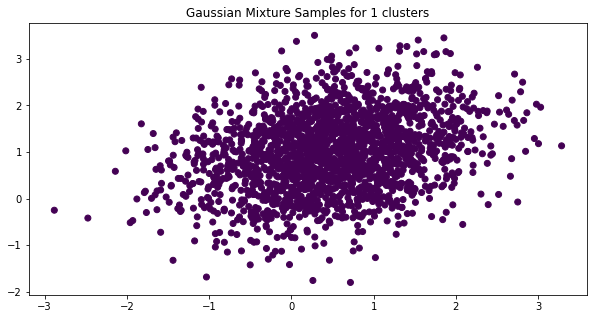

Original parameters:
##########################
Alpha  [1.]
mu  [[0.48753376 0.9980033 ]]
sigma  [[[0.79670788 0.20677066]
  [0.20677066 0.68013929]]]
Estimated parameters:
##########################
 Estimated Alpha  [1.]
 Estimated mu  [[0.49229416 1.00343503]]
Estimated sigma  [[[0.76299812 0.20296186]
  [0.20296186 0.6977784 ]]]


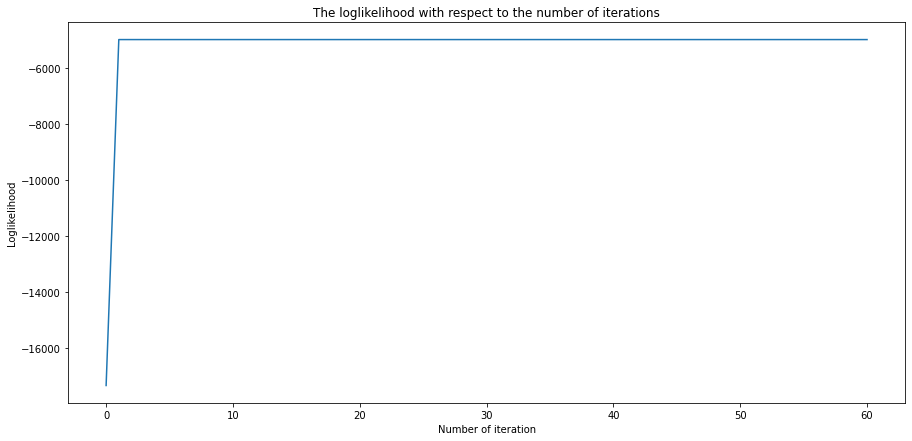

In [15]:
####### PARAMETERS #######
n_clusters = 1
n_samples=2000
##########################


#generate data
alpha, mu, sigma, X, labels = sample_Gaussian_mixture(n_samples, n_clusters, return_parameters=True)
print('Original parameters:')
print('##########################')
print('Alpha ' , alpha)
print('mu ' , mu)
print('sigma ' , sigma)

#EM algorithm 
alpha_EM, mu_EM, sigma_EM, loglikelihood = EM(X, n_clusters)

print('Estimated parameters:')
print('##########################')
print(' Estimated Alpha ' , alpha_EM)
print(' Estimated mu ' , mu_EM)
print('Estimated sigma ' , sigma_EM)

# Plot the results 
plt.figure(figsize=(15,7))
plt.plot(loglikelihood)
plt.ylabel('Loglikelihood')
plt.xlabel('Number of iteration')
plt.title('The loglikelihood with respect to the number of iterations')

plt.show()




> Loglikelihood shows the convergence of the algorithm which is generally around 10 to 30 steps. We can ran the test on. The bigger the sample size or the number of clusters the longer it takes to converge.



### Question 5

Application: On Crude Birth/Death Rate 
For this I used the data provided in https://population.un.org/wpp/Download/Standard/CSV/



> Definition: Crude birth rate indicates the number of live births occurring during the year, per 1,000 population estimated at midyear. Subtracting the crude death rate from the crude birth rate provides the rate of natural increase, which is equal to the rate of population change in the absence of migration.



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


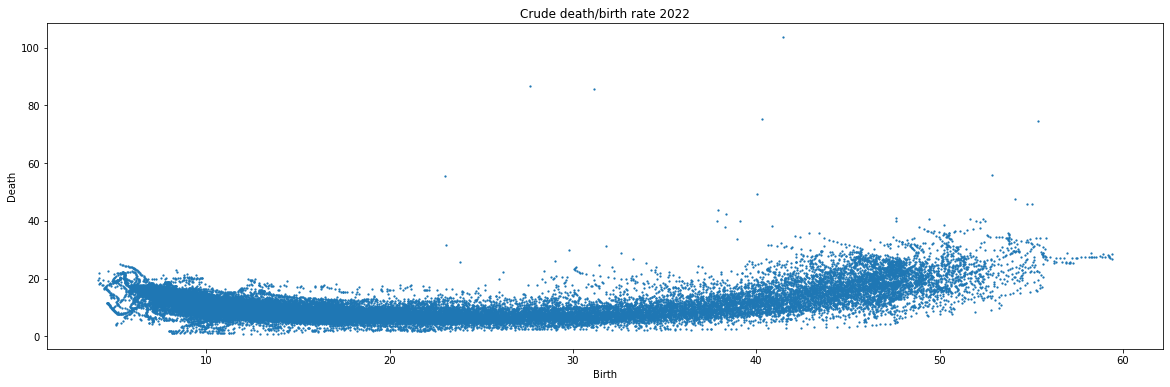

In [16]:
# Load data 
data = pd.read_csv('/content/drive/MyDrive/MVA/Computational statistics/ASSIGNMENT /HW2/Data/WPP2022_Demographic_Indicators_Medium.csv',encoding='latin-1')[['CBR','CDR']].dropna()
CBD = np.array(data)

# Plot the associated scatter graph
plt.figure(figsize=(20,6))
plt.scatter(CBD[:,0],CBD[:,1],s=1.5)
plt.title('Crude death/birth rate 2022')
plt.ylabel('Death')
plt.xlabel('Birth')
plt.show()

We notice that there isn't a distinguishable pattern, hence modeling this data according to the Gaussian mixture law can give interesting results.

### Question 6

We start by defining the BIC plot function for this we get inspired from the scikit learn [source code ](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/mixture/_gaussian_mixture.py#L456)

We can define the Bayenisian information criterion:
Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function.

$BIC=ln(n_{samples})k - 2ln(L)$

with $L$ the maximum likelihood and $k$ number of free parameters to be estimated 




In [17]:
def EM_best(X, n_clusters,n_steps=100, plot_results=False):
  '''
  Computes EM algorithm for a dataset and slects the best using the BIC 

  Parameters
  ----------
  X : array
    The observed data
  n_clusters: list 
      list of numbers of clusters to select the best from 
  n_steps: int default 60
      number of interations of the EM algorithm

  plot_results: bool default False
      Bool to plot all clusters the results
  '''
  #parameters
  n_samples=X.shape[0]
  n_parameters=[ 0.5*(m*5)for m in n_clusters]

  #BIC selection 
  BIC=[]
  mu = []
  sigma =[] 
  alpha=[]
  for i in range(len(n_clusters)): 
    alpha_em, mu_em, sigma_em, loglikelihood = EM(X, n_clusters[i] ,n_steps=n_steps)
    BIC.append( - loglikelihood[-1] + n_parameters[i]* np.log(n_samples))
    alpha.append(alpha_em)
    mu.append(mu_em)
    sigma.append(sigma_em)

  ind_best=np.argmin(BIC)
  
  #Plotting
  ind_clusters=[ind_best]
  if plot_results:
    ind_clusters=range(len(n_clusters))
  
  for i in ind_clusters:
    plt.figure(figsize=(15,7))
    # Plot the data 
    plt.scatter(X[:,0], X[:,1], marker='o',s=1.5) 
    plt.title('EM estimation on data for '+str(n_clusters[i])+' clusters')
    x = np.linspace(0, 60)
    y = np.linspace(0, 40)
    V, W = np.meshgrid(x, y)
    # Plot distributions 
    for j in range(int(n_clusters[i])): 
      Z = - scipy.stats.multivariate_normal.pdf(np.array([V.ravel(), W.ravel()]).T, mu[i][j], sigma[i][j] , allow_singular =True)
      Z = Z.reshape(V.shape)
      plt.contour(V,W, Z)
  plt.show()

  return alpha[ind_best],mu[ind_best],sigma[ind_best], n_clusters[ind_best]


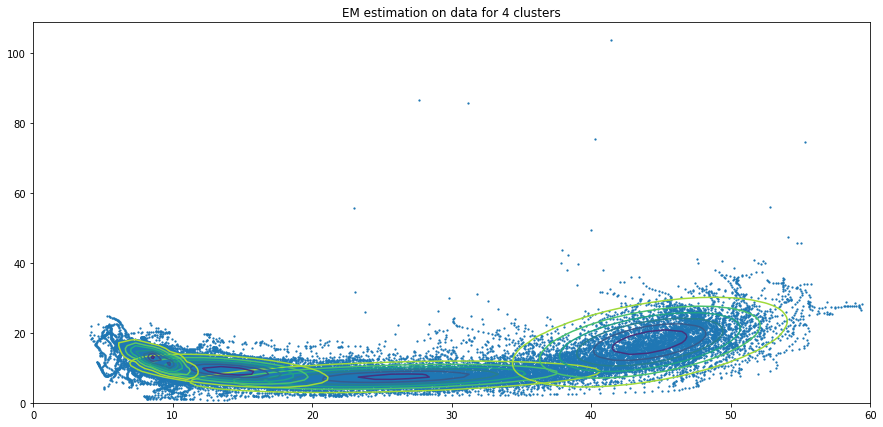

The optimal number of clusters is  4
Estimated parameters:
##########################
 Estimated Alpha  [0.26651243 0.32440347 0.25427096 0.15481315]
 Estimated mu  [[25.96100477  7.42818813]
 [14.04469374  9.14757469]
 [ 8.92100162 12.45173232]
 [44.21031684 17.33932047]]
Estimated sigma  [[[58.1052341   6.03516465]
  [ 6.03516465  5.35282695]]

 [[12.90261956 -3.91741256]
  [-3.91741256  5.76513376]]

 [[ 1.93114284 -2.98539568]
  [-2.98539568  8.15984271]]

 [[24.94188816 15.35206223]
  [15.35206223 42.31352168]]]


In [18]:
####### PARAMETERS #######
n_clusters = range(1,5)
dataset= CBD
##########################

Alpha, mu, sigma, n_clusters=EM_best(dataset, n_clusters)

print('The optimal number of clusters is ', n_clusters)
print('Estimated parameters:')
print('##########################')
print(' Estimated Alpha ' , Alpha)
print(' Estimated mu ' , mu)
print('Estimated sigma ' , sigma)



> There could be several clusters is this dataset since the data is taken from various geographical points that have different distribution.



## Exercise 3: Importance sampling

In this section we are going to implement importance sampling which is a Monte Carlo method for evaluating properties of a particular distribution, while only having samples generated from a different distribution than the distribution of interest


### 3.A – Poor Importance Sampling



```
1. Implement a simple importance sampling procedure for the previous functions.
Be careful when sampling from q supported on R to discard any samples x < 0 when p is supported only for x   0.
```



In [42]:
#Functions for 3A
sign = lambda x: ((x >= 0)^True) +1

def f(x):
  return 2* np.sin(np.pi * x/1.5)*sign(x)

def p(x): 
    return  x**(1.65 - 1) * np.exp(-x**2/2) * sign(x)

def q(x, mu, sigma):
    return (2/np.sqrt(2*np.pi*sigma**2))*np.exp(-((mu - x)**2)/(2*sigma**2))

Using the following code section we can experiment with various μ in order to visualize the link between p*g and  q

the idea is q should be high when p*f is low in order to have low various zhen sampling q

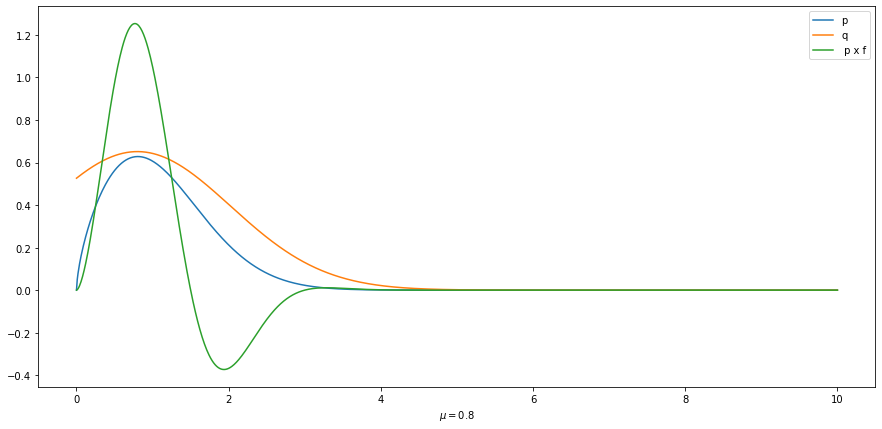

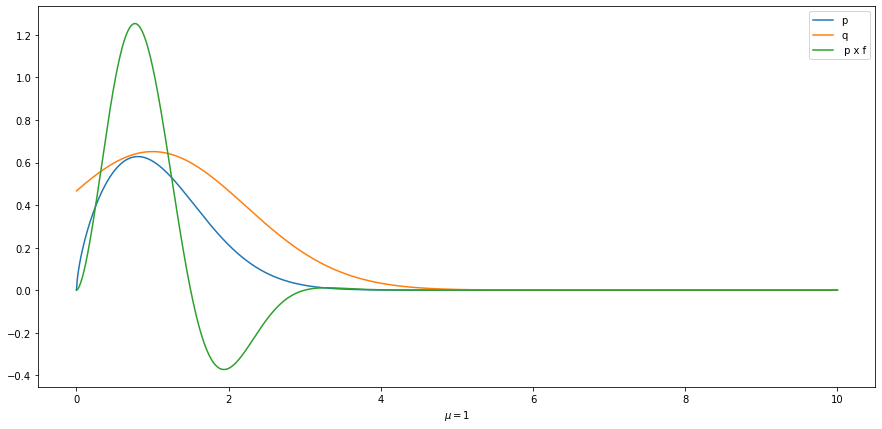

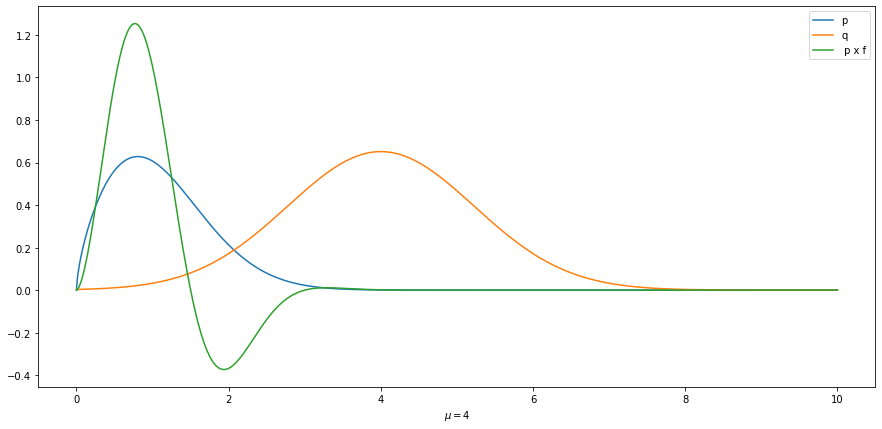

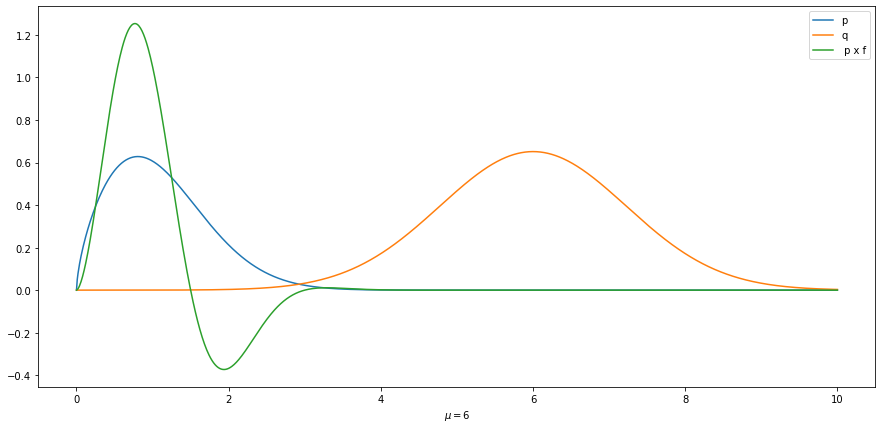

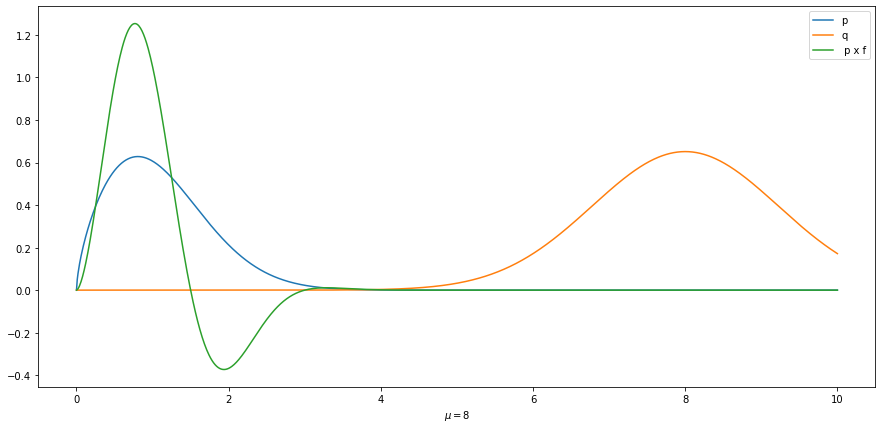

In [51]:
####### PARAMETERS #######
mu_list = [0.8,1,4,6,8]
sigma= np.sqrt(1.5)

##########################
#plotting
x = np.linspace(0, 10, 1000)
p_list = [p(x[i]) for i in range(len(x))]
f_list = [f(x[i]) for i in range(len(x))]
for mu in mu_list:
  q_list = [q(x[i], mu, sigma) for i in range(len(x))]
  

  plt.figure(figsize=(15,7))
  plt.plot(x,p_list, label = 'p')
  plt.plot(x,q_list, label = 'q')
  plt.plot(x,np.array(p_list)*np.array(f_list), label = ' p x f')

  plt.xlabel('$\mu = $' + str(mu))
  plt.legend()
  plt.show()



> we notice that in this particular case a higher mu could yeld better results



In [68]:
def importance_sampling(n_samples,mu,sigma):
  '''
  Estimates E[f] for a function f

  Parameters
  ----------
  n_samples: int
      number of sumples to be randomnly generated 
  mu: float
      mean of importance distribution 
  sigma: float 
      variance of importance distribution 
  '''
  # Generates N samples Randomly while disgarding the negative ones
  X=[]
  n_generated=n_samples
  while n_generated > 0 :
    x_i = np.random.normal(size=1,loc=mu,scale=sigma**2)
    if x_i > 0 : 
      X.append(x_i) 
      n_generated -= 1
  #sort the samples
  X=sorted(X)

  #calculate the estimation 
  weights=[]
  estimated_E=[]
  for x_i in X:
    w_i=p(x_i)/q(x_i,mu,sigma)
    weights.append(w_i)
    estimated_E.append(w_i *f(x_i))

  return np.sum(estimated_E/np.sum(weights)), weights/np.sum(weights)

In [64]:
def importance_sampling(N, mu, sigma): 
    
    it = N 
    samples = []
    
    # Generates N samples Randomly 
    while it > 0 : 
        aux = np.random.normal(size=1,loc=mu,scale=sigma**2)
        if aux > 0 : 
            samples.append(aux)
            it -= 1
    
    # Sort their values 
    samples = sorted(samples)
    
    # Calculate the functions 
    p_list = [p(samples[i]) for i in range(len(samples))]
    q_list = [q(samples[i], mu, sigma) for i in range(len(samples))]
    f_list = [f(samples[i]) for i in range(len(samples))]
    
    # Compute the weights 
    w = [ p_list[i]/q_list[i] for i in range(len(samples))]
    w /= np.sum(w)
    
    # Compute the estimate 
    res = [w[i] * f_list[i] for i in range(len(samples))]
   
    return(np.sum(res) , w)



```
2_ Compute the mean and the variance of the importance sampling estimate of Ep[f(X)]. You can use several sample sizes, for instance N = 10, 100, 103 and 104.

```



N =  10   ; the estimate =  0.23102838330702402
N =  100   ; the estimate =  0.5359062389317962
N =  1000   ; the estimate =  0.7761951374917011
N =  5000   ; the estimate =  0.7013052359943128
N =  10000   ; the estimate =  0.6796640557119398


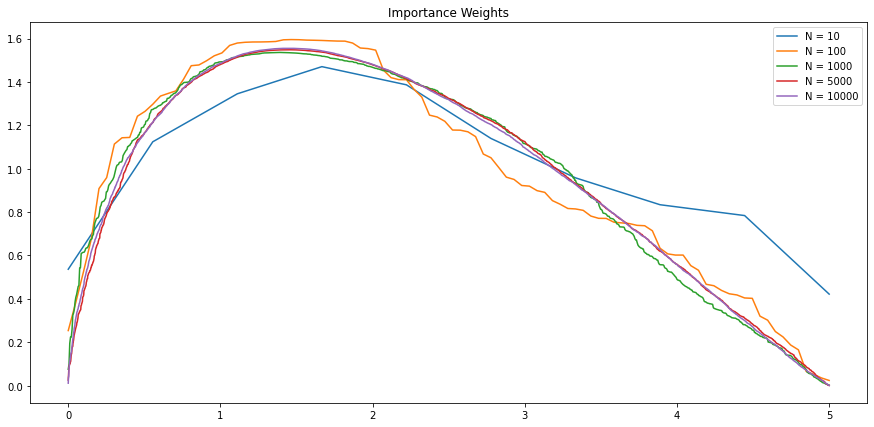

In [72]:
####### PARAMETERS #######
mu = 0.8
sigma= np.sqrt(1.5)

##########################
# List of sample sizes 
N = [10 ,100 ,1000, 5000, 10000]

plt.figure(figsize=(15,7))

# Ploting the importance weights and printing the estimates 
for n in N :
    E , weights = importance_sampling(n, mu, sigma)
    print('N = ', n , '  ; the estimate = ', E )
    plt.plot(np.linspace(0,5,n), weights*n , label = 'N = ' + str(n))

plt.title('Importance Weights')
plt.legend()
plt.show()




```
3-Shift the mean of q, μ = 6, so that the centers of mass for each distribution are far apart and repeat the experiment. Compare the importance weights for both values of μ.
```



N =  10   ; the estimate =  1.6065817407811576
N =  100   ; the estimate =  1.8101294220377893
N =  1000   ; the estimate =  -1.1270503105952348
N =  5000   ; the estimate =  1.1060093568491347
N =  10000   ; the estimate =  0.8250191350350529


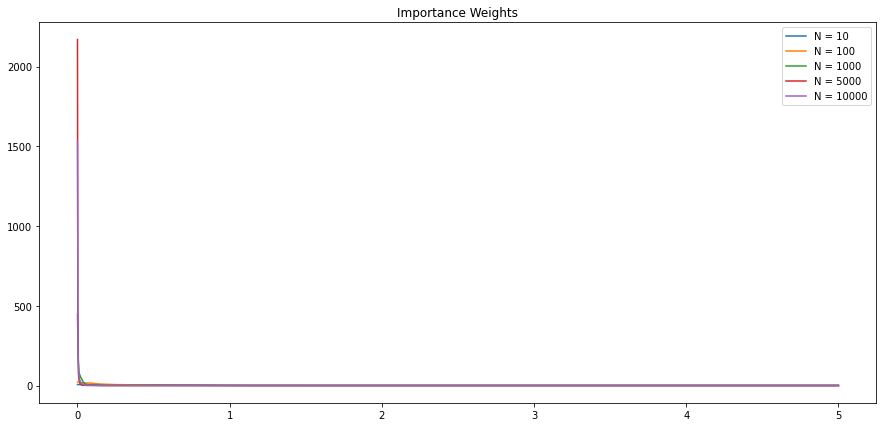

In [73]:
####### PARAMETERS #######
mu = 6
sigma= np.sqrt(1.5)

##########################
# List of sample sizes 
N = [10 ,100 ,1000, 5000, 10000]

plt.figure(figsize=(15,7))

# Ploting the importance weights and printing the estimates 
for n in N :
    E , weights = importance_sampling(n, mu, sigma)
    print('N = ', n , '  ; the estimate = ', E )
    plt.plot(np.linspace(0,5,n), weights*n , label = 'N = ' + str(n))

plt.title('Importance Weights')
plt.legend()
plt.show()


Comparision


> For μ=0.8 we notice that the weights are farther than wero meaning that the function q is not optimal for the distribution of p. Kepping in mind that the importance sampling requires that q be high when p is low and low when p is high hence making the ratio closer to zero. On the contrary this requirement is satisfied for μ=6, hence this q would be a better importance sampling density 


